In [1]:
from sir import *
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
t=pd.read_csv("case_daily_trends__united_states.csv",header=2).iloc[:,2]

In [3]:
t=pd.read_csv("case_total_and_rate_per_100000__united_states.csv",header=2).iloc[:,1]
total_case=np.array(t)
total_case[:10]

array([14462527, 14255535, 14041436, 13822249, 13626022, 13447627,
       13295605, 13142997, 12999664, 12827266])

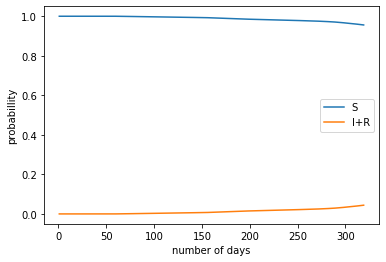

In [4]:
totalpopulation=328200000
S=totalpopulation-total_case
S=S/totalpopulation
IandR=total_case/totalpopulation
time=[*range(len(total_case), 0, -1)] 
plt.plot(time,S,label="S")
plt.plot(time,IandR,label="I+R")
plt.legend()
plt.xlabel("number of days")
plt.ylabel("probabillity")
plt.show()

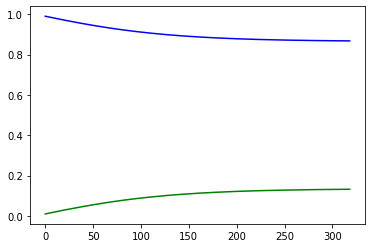

In [5]:
b=0.1
k=0.1
time=319
ii=0.01
r=0
q=1

sol1=SIR_continuous(b,k,time,ii,r,q)
plt.plot(sol1.t, sol1.y[0], c='b',label='s')    # generate the plot
plt.plot(sol1.t, (sol1.y[1]+sol1.y[2]), c='g',label='r+i')
#plt.plot(sol1.t, sol1.y[2]*1000, c='r',label='i')
plt.show()

In [6]:
def loss(b,k,r):
    ii=0.01
    time=len(S)
    q=1
    sol1=SIR_continuous(b,k,time,ii,r,q)
    return np.linalg.norm(sol1.y[0]-S)+np.linalg.norm((sol1.y[1]+sol1.y[2])-IandR)

In [7]:
def loss2(x):
    b=x[0]
    k=x[1]
    r=x[2]
    ii=0.01
    time=len(S)
    q=1
    sol1=SIR_continuous(b,k,time,ii,r,q)
    return np.linalg.norm(sol1.y[0]-S)+np.linalg.norm((sol1.y[1]+sol1.y[2])-IandR)

In [8]:
def loss3(x):
    b=0.0001
    k=0.074
    ii=0.01
    time=len(S)
    q=1
    sol1=SIR_continuous(b,k,time,ii,x,q)
    return np.linalg.norm(sol1.y[0]-S)+np.linalg.norm((sol1.y[1]+sol1.y[2])-IandR)

In [9]:
sol = opt.minimize(loss2, np.array([-9.66889007e-06, -9.85879953e-01,  9.77224552e-01]))
sol

      fun: 0.3795335303734637
 hess_inv: array([[ 1.84232949e-07, -1.79734714e-02,  1.79721938e-02],
       [-1.79734708e-02,  1.97769493e+03, -1.97889536e+03],
       [ 1.79721932e-02, -1.97889536e+03,  1.98010401e+03]])
      jac: array([8.97940301, 0.01231857, 0.01223065])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 836
      nit: 81
     njev: 165
   status: 2
  success: False
        x: array([-9.66889007e-06, -9.85879953e-01,  9.77224552e-01])

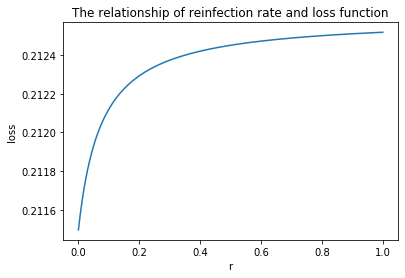

In [88]:
losslist=[]
rlist=[]
n=1000
for i in range(n):
    r=i/n
    losslist.append(loss3(r))
    rlist.append(r)
plt.plot(rlist,losslist)
plt.xlabel('r')
plt.ylabel('loss')
plt.title('The relationship of reinfection rate and loss function')
plt.savefig('rvsloss')

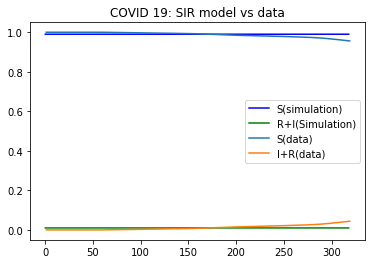

In [89]:
b=0.0001
k=0.074
time=319
ii=0.01
r=0.01
q=1
times=[*range(len(total_case), 0, -1)] 
sol1=SIR_continuous(b,k,time,ii,r,q)
plt.plot(sol1.t, sol1.y[0], c='b',label='S(simulation)')    # generate the plot
plt.plot(sol1.t, (sol1.y[1]+sol1.y[2]), c='g',label='R+I(Simulation)')
plt.plot(times,S,label="S(data)")
plt.plot(times,IandR,label="I+R(data)")
plt.legend()
plt.title("COVID 19: SIR model vs data")
plt.savefig('modelvsdata')